In [1]:
from google.colab import files
uploaded=files.upload()
print(uploaded)

Saving event_feedback.csv to event_feedback.csv
{'event_feedback.csv': b'Name,Department,Event,Rating,Feedback\nAmit Sharma,CSE,Coding Hackathon,5,It was amazing and well organized\nPriya Das,IT,Robotics Workshop,4,"Loved the hands-on part, but a bit lengthy"\nRohit Gupta,EEE,Guest Lecture on AI,3,Informative but slightly boring\nSneha Roy,CSE,Cultural Fest,5,Best fest ever! Enjoyed a lot\nArjun Singh,ME,Robotics Workshop,2,"Too technical, couldn\'t follow properly"\nMeera Nair,ECE,Coding Hackathon,4,"Great event, learned new things"\nKaran Patel,CSE,Sports Meet,5,Very well managed and exciting matches\nRiya Sen,IT,Cultural Fest,4,"Good performances, but sound system was poor"\nAnkit Verma,EEE,Guest Lecture on AI,5,Excellent insights from the speaker\nShivani Das,CSE,Sports Meet,3,"Average, could have been more organized"\n'}


In [2]:
!pip install pandas matplotlib seaborn textblob nltk wordcloud


In [3]:
from google.colab import files
import pandas as pd
uploaded = files.upload()
df = pd.read_csv("event_feedback.csv")
df.head()


,Name,Department,Event,Rating,Feedback
0,Amit Sharma,CSE,Coding Hackathon,5,It was amazing and well organized
1,Priya Das,IT,Robotics Workshop,4,"Loved the hands-on part, but a bit lengthy"
2,Rohit Gupta,EEE,Guest Lecture on AI,3,Informative but slightly boring
3,Sneha Roy,CSE,Cultural Fest,5,Best fest ever! Enjoyed a lot
4,Arjun Singh,ME,Robotics Workshop,2,"Too technical, couldn't follow properly"


In [5]:
print(df.isnull().sum())
df["Rating"] = df["Rating"].fillna(df["Rating"].mean())
df = df.drop_duplicates()

Name          0
Department    0
Event         0
Rating        0
Feedback      0
dtype: int64


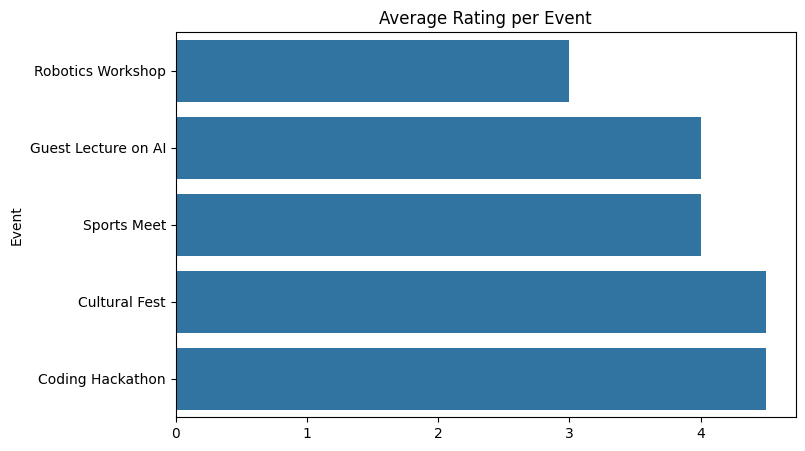

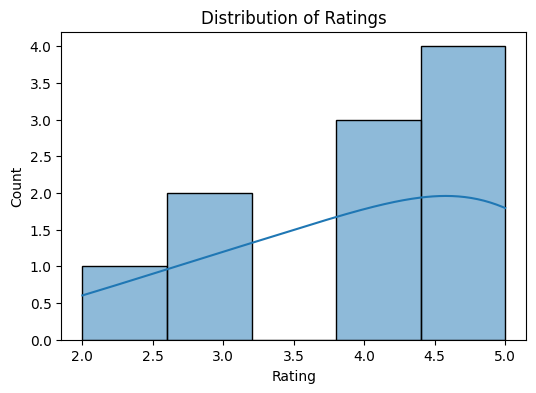

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns
avg_rating = df.groupby("Event")["Rating"].mean().sort_values()
plt.figure(figsize=(8,5))
sns.barplot(x=avg_rating.values, y=avg_rating.index)
plt.title("Average Rating per Event")
plt.show()
plt.figure(figsize=(6,4))
sns.histplot(df["Rating"], bins=5, kde=True)
plt.title("Distribution of Ratings")
plt.show()

Sentiment
Positive    8
Negative    1
Neutral     1
Name: count, dtype: int64


/tmp/ipython-input-2221334922.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Sentiment", data=df, palette="Set2")


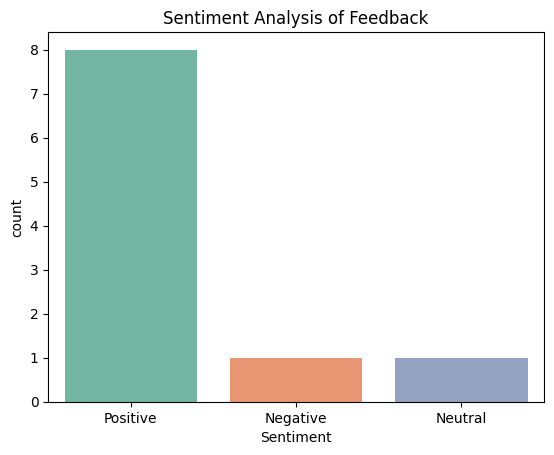

In [17]:
from textblob import TextBlob
def get_sentiment(text):
    polarity = TextBlob(str(text)).sentiment.polarity
    if polarity > 0:
        return "Positive"
    elif polarity < 0:
        return "Negative"
    else:
        return "Neutral"
df["Sentiment"] = df["Feedback"].apply(get_sentiment)
print(df["Sentiment"].value_counts())
sns.countplot(x="Sentiment", data=df, palette="Set2")
plt.title("Sentiment Analysis of Feedback")
plt.show()

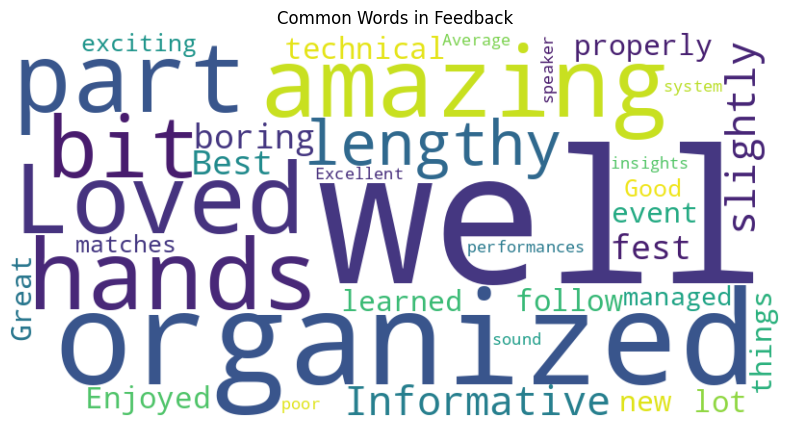

In [19]:
from wordcloud import WordCloud
text = " ".join(df["Feedback"])
wordcloud = WordCloud(width=800, height=400, background_color="white").generate(text)
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Common Words in Feedback")
plt.show()

In [21]:
print("Average Rating:", df["Rating"].mean())
print("Best Event:", df.groupby("Event")["Rating"].mean().idxmax())
print("Worst Event:", df.groupby("Event")["Rating"].mean().idxmin())
df.to_csv("event_feedback.csv", index=False)
files.download("event_feedback.csv")

Average Rating: 4.0
Best Event: Coding Hackathon
Worst Event: Robotics Workshop


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

/tmp/ipython-input-3012555210.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Event", y="Rating", data=df, estimator=lambda x: sum(x)/len(x), palette="viridis")


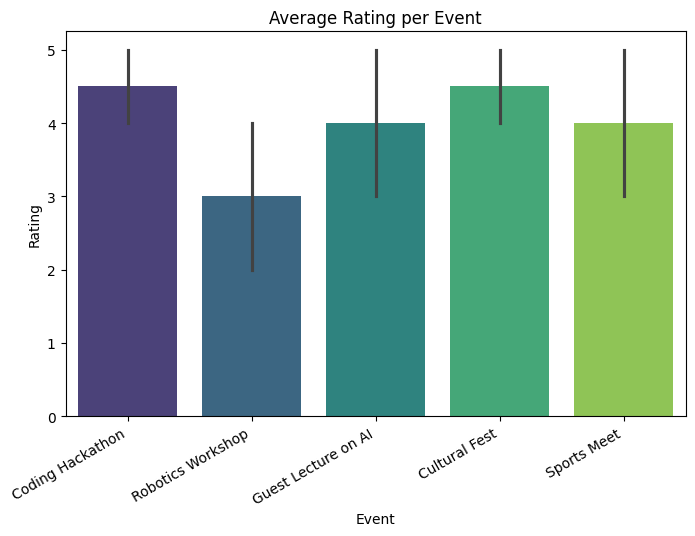

In [22]:
plt.figure(figsize=(8,5))
sns.barplot(x="Event", y="Rating", data=df, estimator=lambda x: sum(x)/len(x), palette="viridis")
plt.xticks(rotation=30, ha="right")
plt.title("Average Rating per Event")
plt.show()
